In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_excel("2025-04-18 Исследование факторов успеваемости студентов — копия.xlsx", sheet_name="Sheet")
print(data)
# Предобработка данных
# Удаление некорректных значений в столбце "Средний балл за прошлый семестр"
data["Средний балл за прошлый семестр"] = pd.to_numeric(data["Средний балл за прошлый семестр"], errors="coerce")
data = data.dropna(subset=["Средний балл за прошлый семестр"])

# Категориальные переменные в числовые

data["Пол"] = data["Пол"].map({"Женский": 0, "Мужской": 1})
data["Уровень обучения"] = data["Уровень обучения"].map({"СПО": 0, "ВО": 1})
data["Первое проф. образование"] = data["Первое проф. образование"].map({"Да": 1, "Нет": 0})

data["Доп образование"] = data["Доп образование"].replace({
    "Да, есть доп. образование": "Да, есть дополнительное образование",
    "Получаю доп. образование": "Да, получаю в данный момент"
})
data["Доп образование"] = data["Доп образование"].map({
    "Нет": 0,
    "Да, есть дополнительное образование": 1,
    "Да, получаю в данный момент": 1
})

data["Многодетная семья"] = data["Многодетная семья"].map({
    "Нет, я единственный ребенок": 0,
    "Да, у меня есть брат/сестра": 1,
    "Да, у меня больше 1 брата/сестры": 2
})

data["AI в учебе"] = data["AI в учебе"].map({
    "Нет, не признаю ИИ": 0,
    "Да, с целью быстрого поиска необходимой информации": 1,
    "Да, полностью делаю работы с его помощью (списываю)": 2,
    "Да, нахожу более оптимальное решение": 3
})

data["Семейное положение"] = data["Семейное положение"].map({
    "Не женат/не замужем": 0,
    "Женат/замужем": 1
})

data.columns = data.columns.str.strip()
data["Работаете"] = data["Работаете"].map({
    "Да, работаю полный рабочий день": 1,
    "Да, подрабатываю (до 4 часов в день)": 2,
    "Нет": 3
})
data["Работает"] = data["Работаете"].map({1: 1, 2: 1, 3: 0})


data["Волонтерство"] = data["Волонтерство"].map({"Да": 1, "Нет": 0})
data["Студ. активности"] = data["Студ. активности"].map({"Да": 1, "Нет": 0})
data["Курение"] = data["Курение"].map({"Нет": 0, "Да": 1})

# Удалим пробелы в названиях столбцов
data.columns = data.columns.str.strip()

print("Типы данных: ", data.dtypes)


# Удалим строки с пропущенными значениями
data = data.dropna()

numerical_cols = [
    "Пол",
    "Возраст",
    "Уровень обучения",
    "Курс",
    "Первое проф. образование",
    "Доп образование",
    "Домашняя работа",
    "Волонтерство",
    "Студ. активности",
    "Процент посещаемости", 
    "Многодетная семья",
    "AI в учебе",
    "Семейное положение",
    "Время на учебу",
    "Мотивация",
    "Работает",
    "Стресс",
    "Курение",
    "Игры в компьютер",
    "Дети"
]

non_binary_cols = [
    "Возраст",
    "Процент посещаемости",
    "Время на учебу",
    "Игры в компьютер",
    "Работает"
]

binary_cols = [
    "Первое проф. образование",
    "Доп образование",
    "Семейное положение",
    "Дети"
]

print("Проверка баланса")
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())
for col in ["Доп образование", "Семейное положение", "Работает", "Первое проф. образование", "Дети"]:
    print(f"{col}:")
    print(data[col].value_counts(dropna=False))
    print()




         Пол  Возраст  ... Курение  Игры в компьютер
0    Женский       19  ...     Нет                 5
1    Мужской       26  ...     Нет                10
2    Мужской       20  ...     Нет                 2
3    Женский       19  ...      Да                10
4    Женский       19  ...      Да                 9
..       ...      ...  ...     ...               ...
322  Женский       20  ...     Нет                 0
323  Женский       20  ...      Да                 5
324  Мужской       16  ...     Нет                 2
325  Мужской       21  ...      Да                45
326  Женский       17  ...     Нет                 0

[327 rows x 21 columns]
Типы данных:  Пол                                  int64
Возраст                              int64
Уровень обучения                     int64
Курс                                 int64
Средний балл за прошлый семестр    float64
Первое проф. образование             int64
Доп образование                      int64
Процент посещаемости    

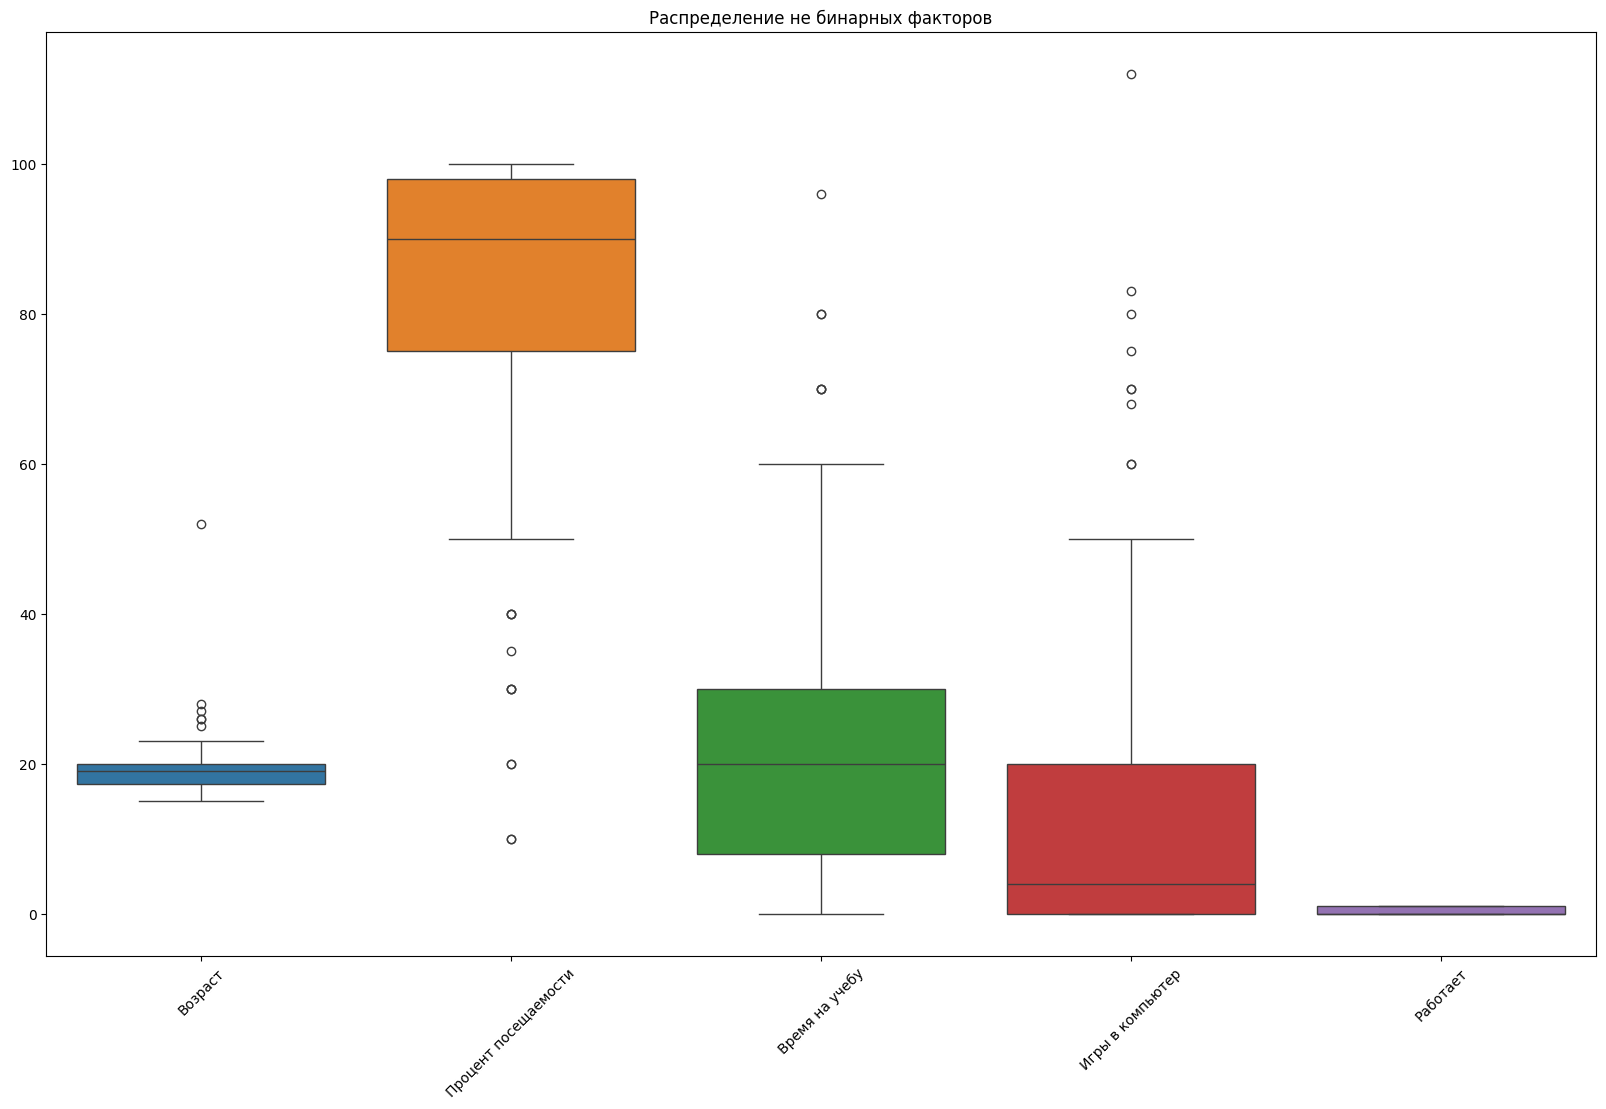

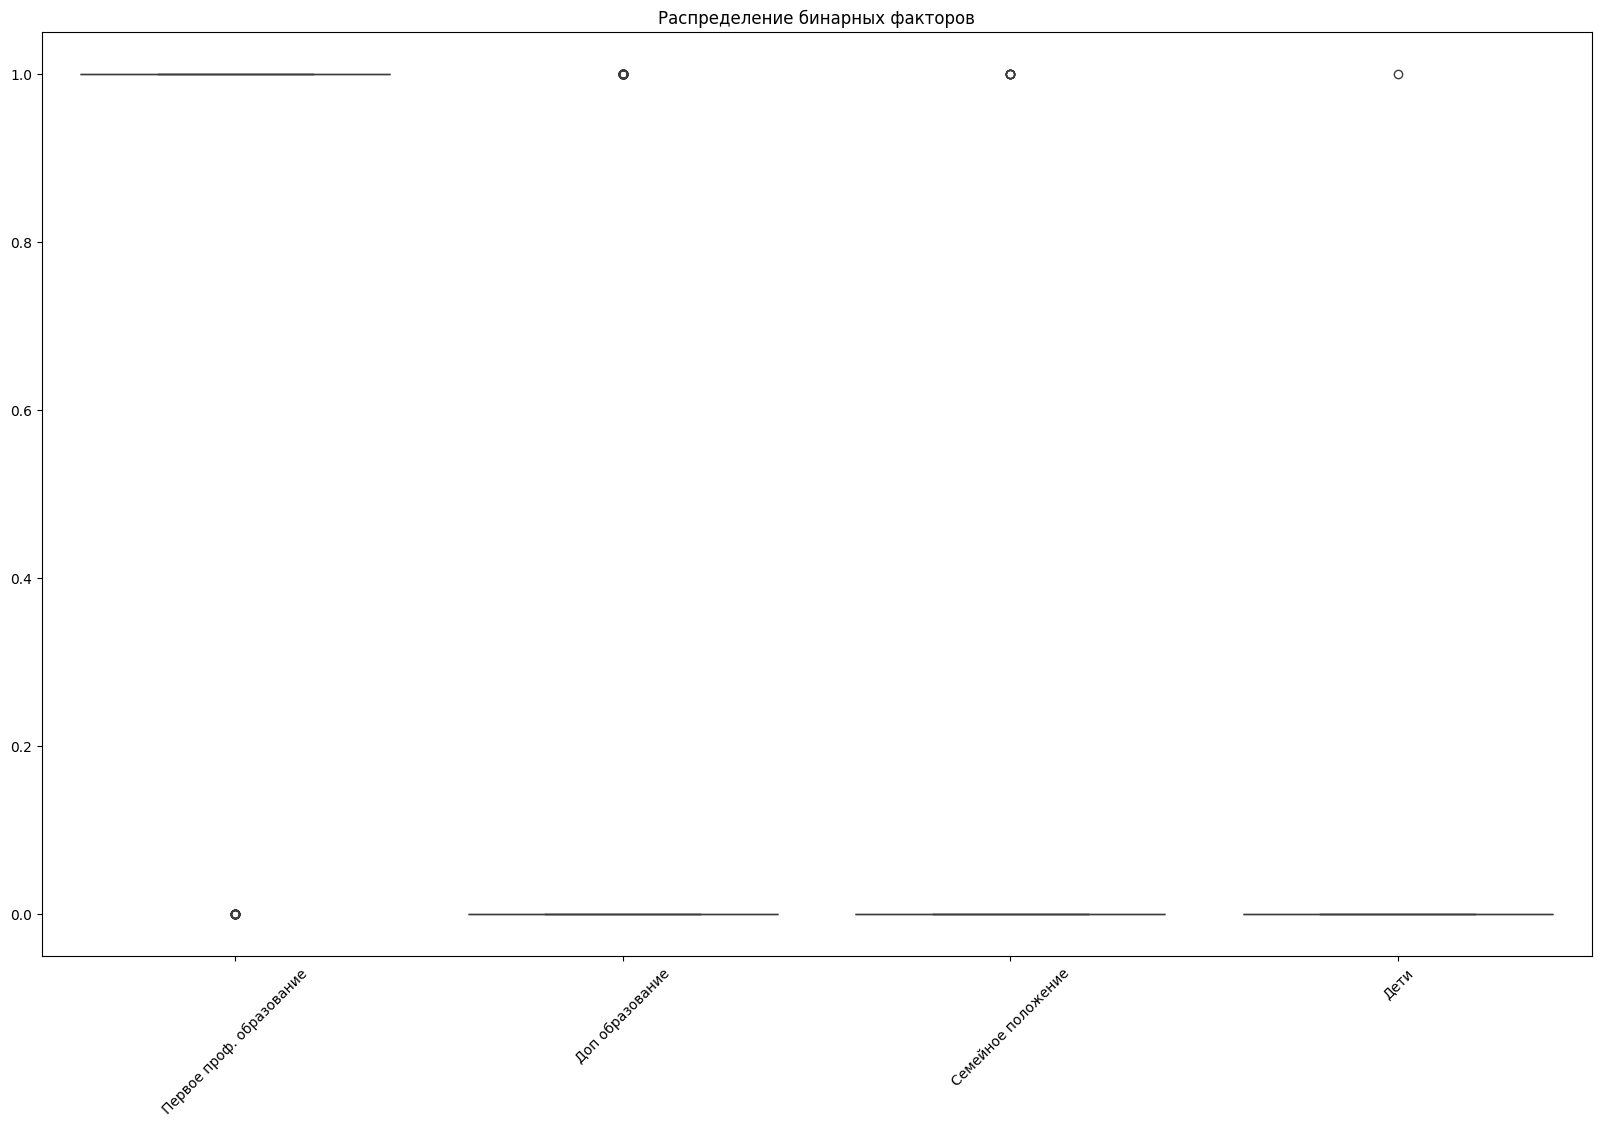

In [165]:
#Анализ выбросов
plt.figure(figsize=(20, 12))
sns.boxplot(data=data[non_binary_cols])
plt.title("Распределение не бинарных факторов")
plt.xticks(rotation=45)
plt.savefig("boxplot_outliers_non_binary_cols.png")
plt.show()

#Анализ выбросов
plt.figure(figsize=(20, 12))
sns.boxplot(data=data[binary_cols])
plt.title("Распределение бинарных факторов")
plt.xticks(rotation=45)
plt.savefig("boxplot_outliers_binary_cols.png")
plt.show()

# Обработка выбросов через IQR
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= (Q1 - 1.5 * IQR)) & (data[col] <= (Q3 + 1.5 * IQR))]



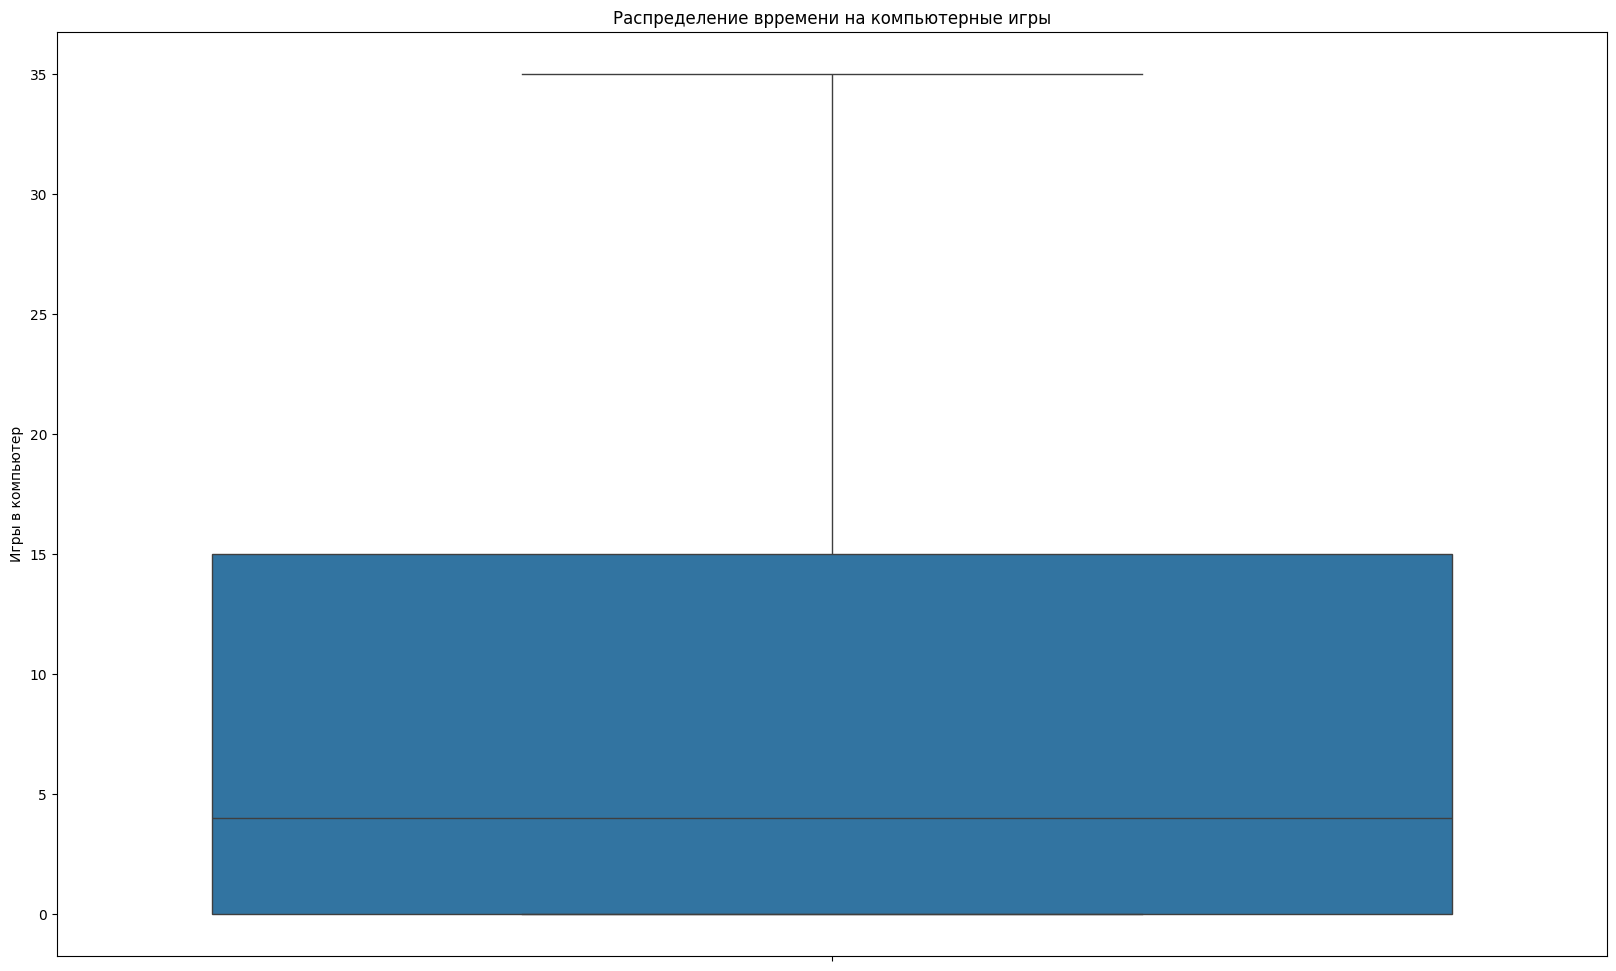

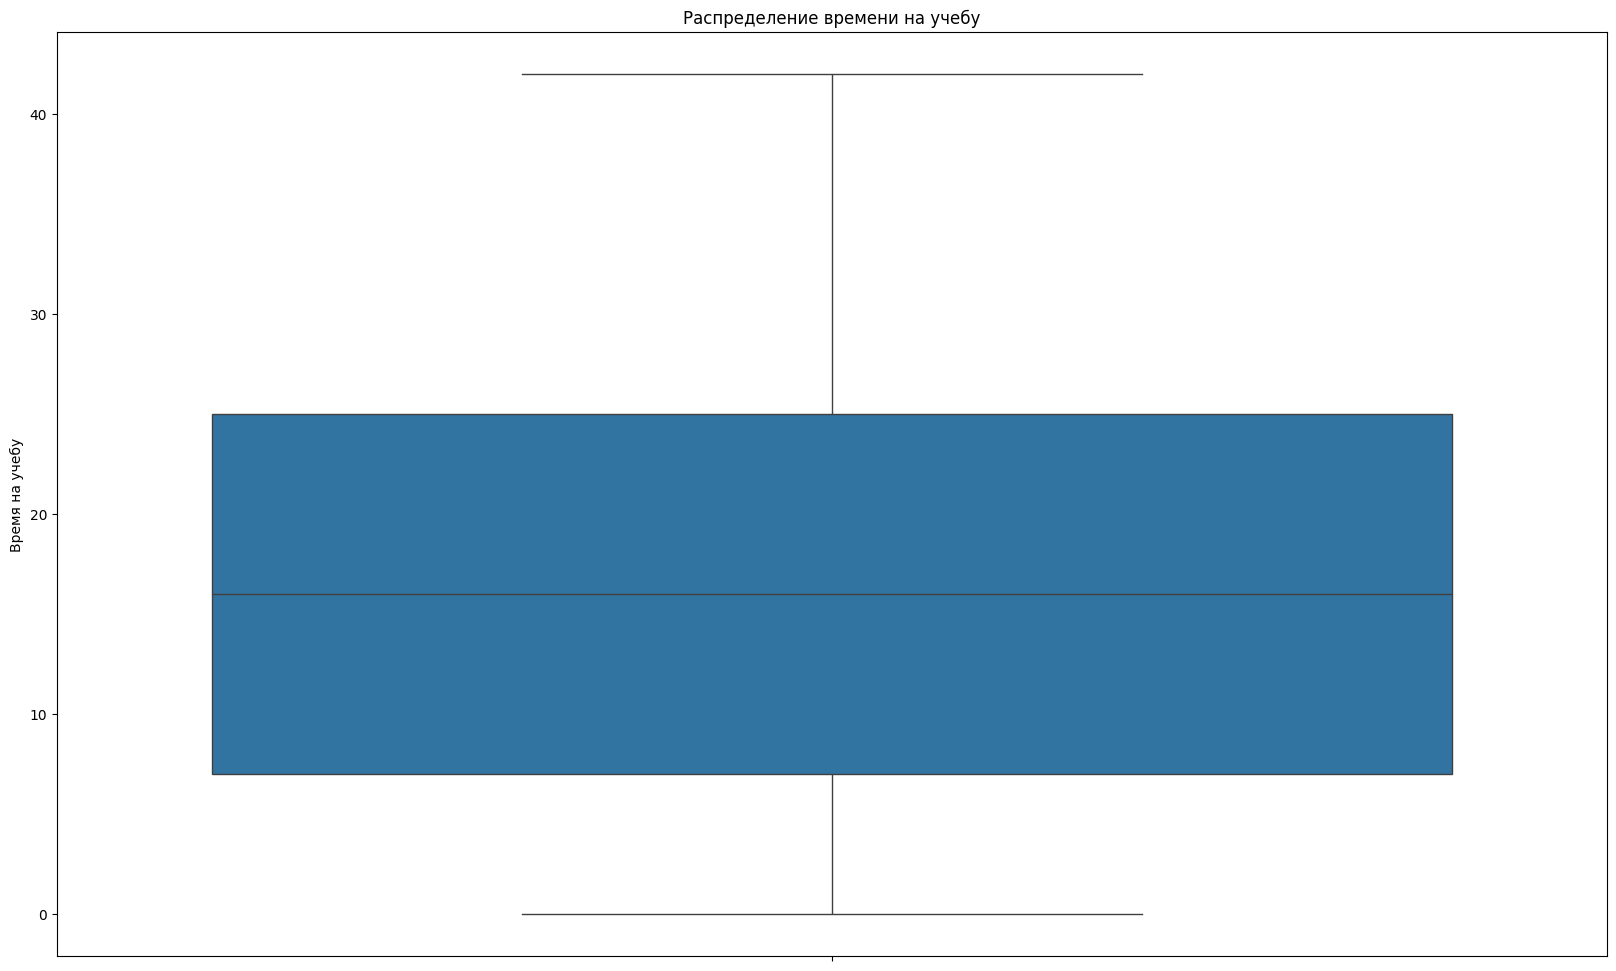

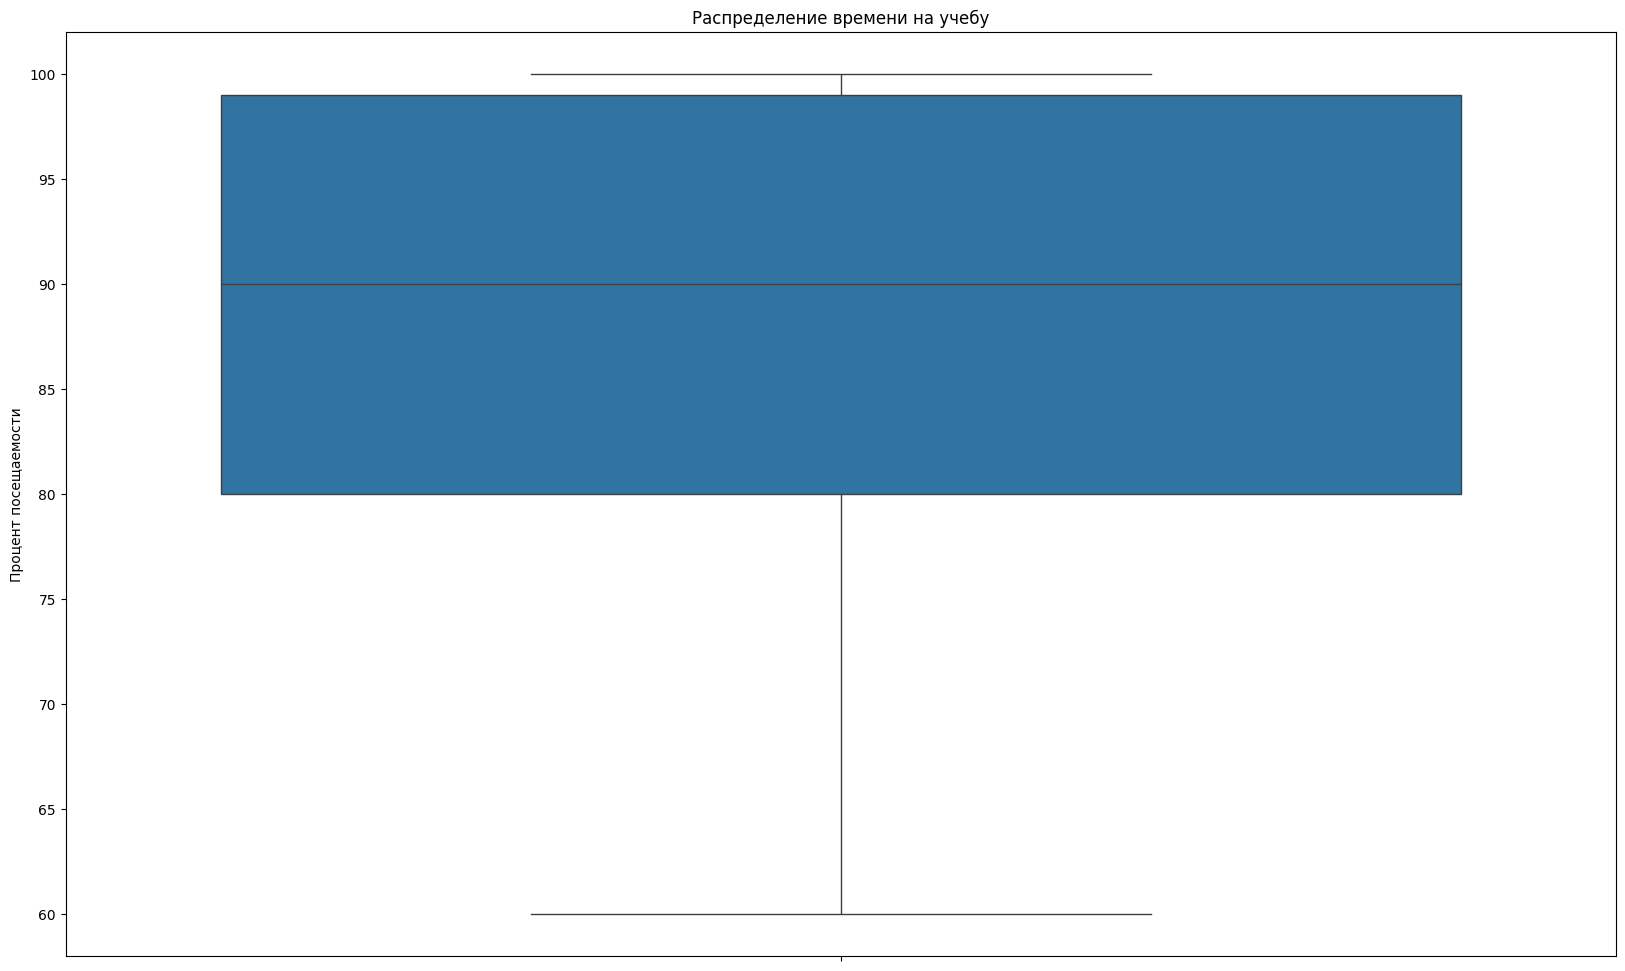

In [166]:
import numpy as np

data["Время на учебу"] = np.where(data["Время на учебу"] > 45, 25, data["Время на учебу"])

data["Игры в компьютер"] = np.where(data["Игры в компьютер"] > 35, 15, data["Игры в компьютер"])

data["Процент посещаемости"] = np.where(data["Процент посещаемости"] < 20, 65, data["Процент посещаемости"])

#Анализ выбросов
plt.figure(figsize=(20, 12))
sns.boxplot(data=data["Игры в компьютер"])
plt.title("Распределение врремени на компьютерные игры")
plt.xticks(rotation=45)
plt.savefig("boxplot_outliers_binary_cols.png")
plt.show()
#Анализ выбросов
plt.figure(figsize=(20, 12))
sns.boxplot(data=data["Время на учебу"])
plt.title("Распределение времени на учебу")
plt.xticks(rotation=45)
plt.savefig("boxplot_outliers_binary_cols.png")
plt.show()

plt.figure(figsize=(20, 12))
sns.boxplot(data=data["Процент посещаемости"])
plt.title("Распределение времени на учебу")
plt.xticks(rotation=45)
plt.savefig("boxplot_outliers_binary_cols.png")
plt.show()

# Обработка выбросов через IQR
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= (Q1 - 1.5 * IQR)) & (data[col] <= (Q3 + 1.5 * IQR))]


In [167]:
print(data.corr())

for col in data.columns:
    if data[col].nunique() <= 1:
        print(f"{col} — нет вариации")

print("Работает:", data["Работает"].unique(), data["Работает"].dtype)
print("NaN в Работает:", data["Работает"].isnull().sum())
print("Корреляция с Пол:", data["Работает"].corr(data["Пол"]))


                                      Пол   Возраст  ...  Игры в компьютер  Работает
Пол                              1.000000 -0.085493  ...          0.337245       NaN
Возраст                         -0.085493  1.000000  ...         -0.160579       NaN
Уровень обучения                 0.063078  0.419823  ...         -0.209814       NaN
Курс                            -0.167039  0.327669  ...          0.087218       NaN
Средний балл за прошлый семестр -0.276035 -0.101749  ...         -0.285209       NaN
Первое проф. образование              NaN       NaN  ...               NaN       NaN
Доп образование                       NaN       NaN  ...               NaN       NaN
Процент посещаемости            -0.240344  0.028717  ...         -0.143217       NaN
Домашняя работа                 -0.261551 -0.041003  ...         -0.104785       NaN
Время на учебу                  -0.203551  0.120248  ...         -0.075753       NaN
Волонтерство                     0.070654  0.023165  ...         

c:\Users\HUAWEI\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [168]:
print(data.corr())

for col in data.columns:
    if data[col].nunique() <= 1:
        print(f"{col} — нет вариации")

print("Работает:", data["Работает"].unique(), data["Работает"].dtype)
print("NaN в Работает:", data["Работает"].isnull().sum())
print("Корреляция с Пол:", data["Работает"].corr(data["Пол"]))


                                      Пол   Возраст  ...  Игры в компьютер  Работает
Пол                              1.000000 -0.085493  ...          0.337245       NaN
Возраст                         -0.085493  1.000000  ...         -0.160579       NaN
Уровень обучения                 0.063078  0.419823  ...         -0.209814       NaN
Курс                            -0.167039  0.327669  ...          0.087218       NaN
Средний балл за прошлый семестр -0.276035 -0.101749  ...         -0.285209       NaN
Первое проф. образование              NaN       NaN  ...               NaN       NaN
Доп образование                       NaN       NaN  ...               NaN       NaN
Процент посещаемости            -0.240344  0.028717  ...         -0.143217       NaN
Домашняя работа                 -0.261551 -0.041003  ...         -0.104785       NaN
Время на учебу                  -0.203551  0.120248  ...         -0.075753       NaN
Волонтерство                     0.070654  0.023165  ...         

c:\Users\HUAWEI\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


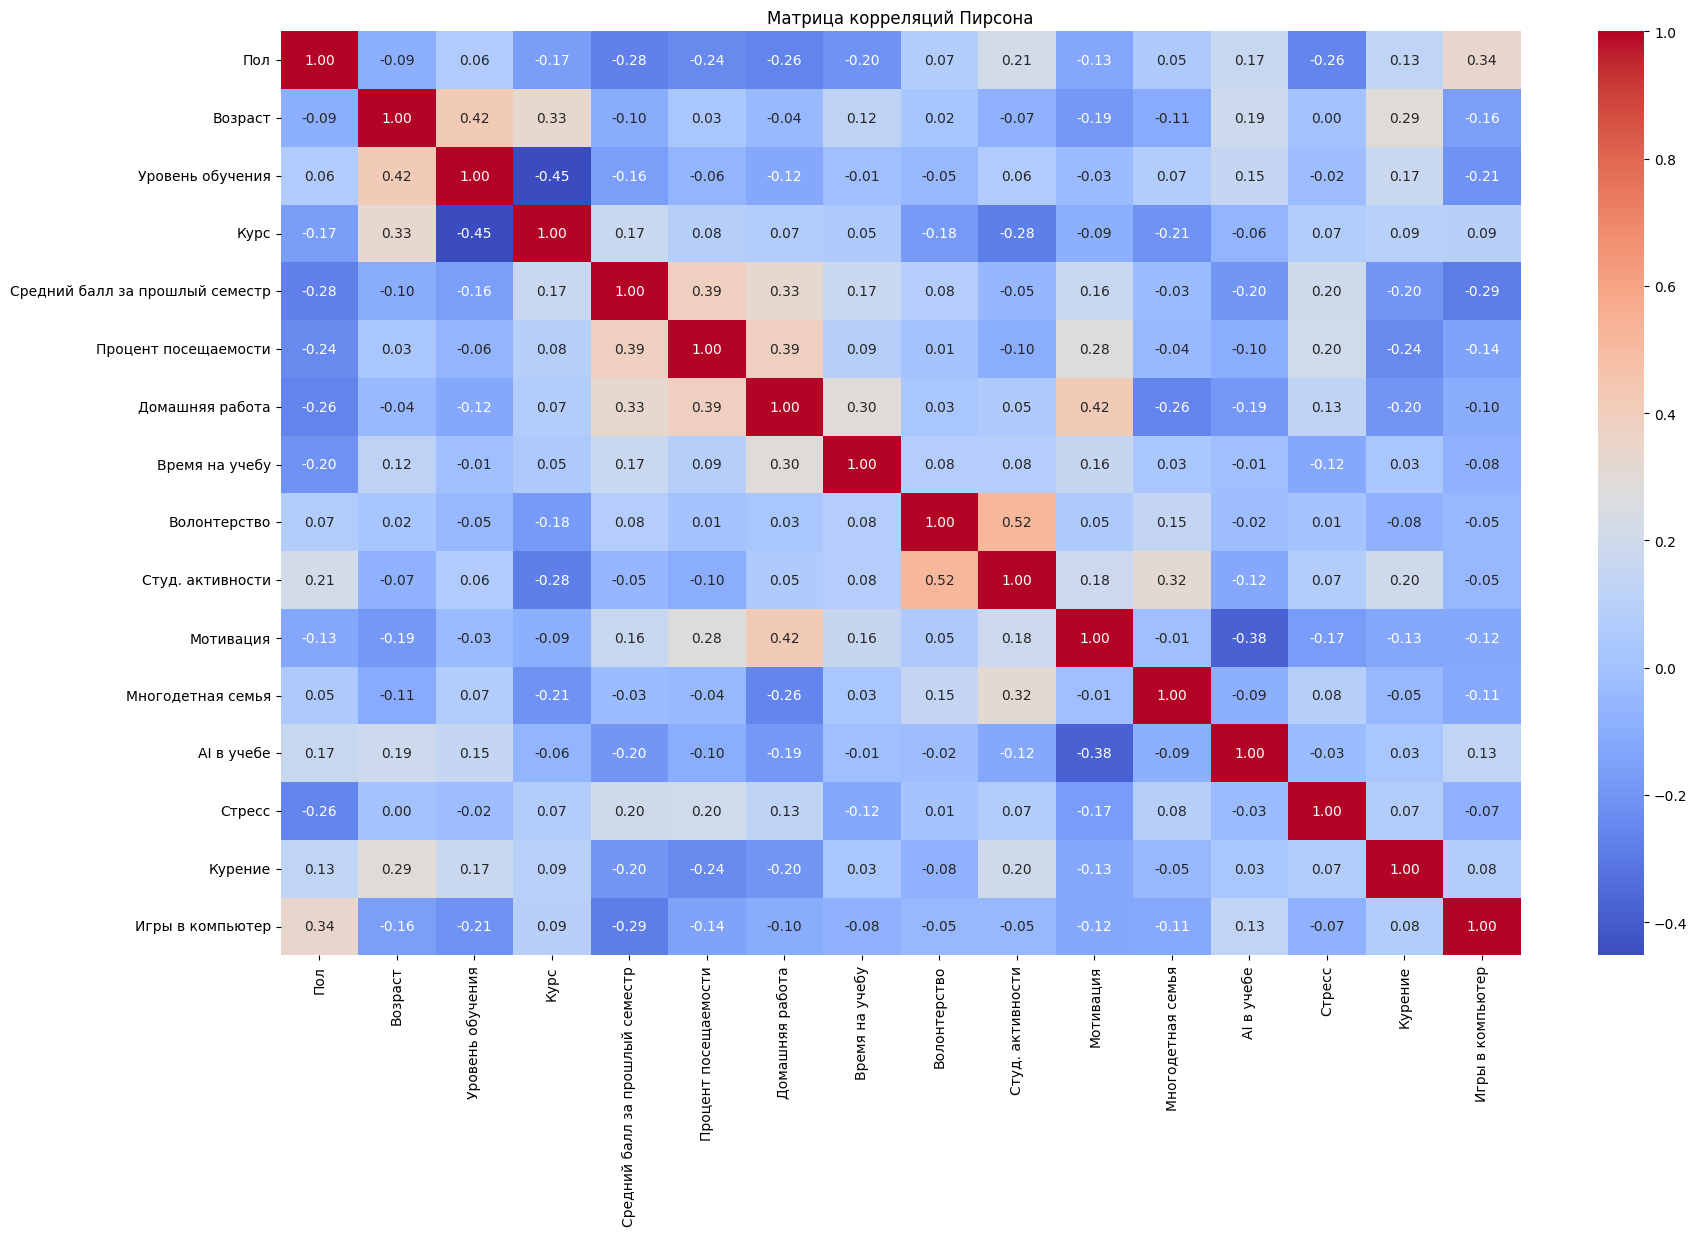

In [169]:
data = data.drop(columns=["Первое проф. образование", "Доп образование", "Дети", "Работает", "Работаете", "Семейное положение"])

corr_matrix = data.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляций Пирсона")
plt.savefig("correlation_matrix.png")
plt.show()

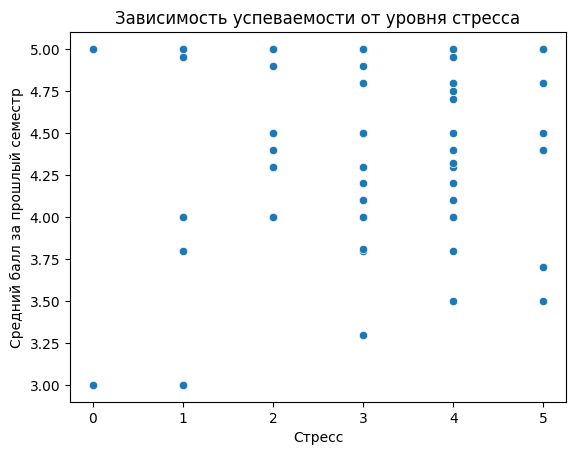

In [170]:
sns.scatterplot(x="Стресс", y="Средний балл за прошлый семестр", data=data)
plt.title("Зависимость успеваемости от уровня стресса")
plt.show()



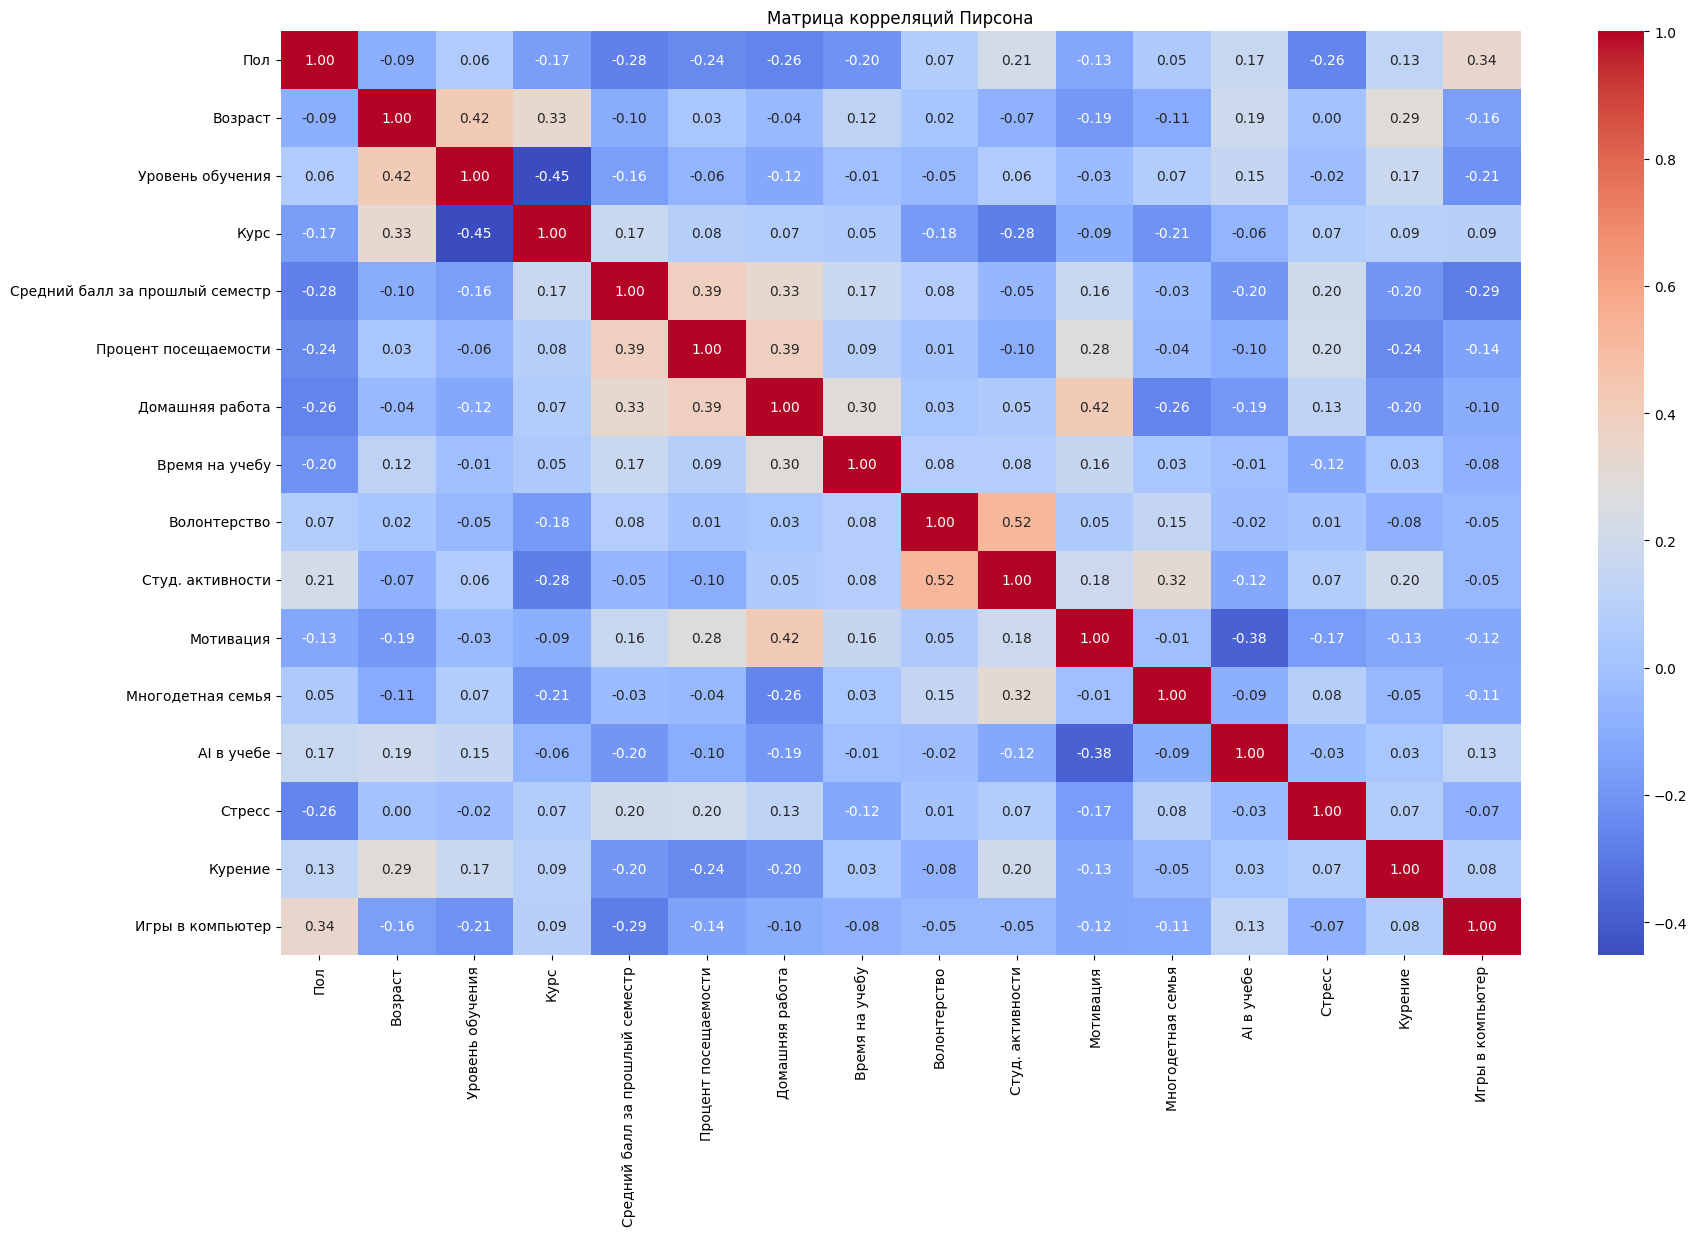

In [171]:
data = data.drop(columns=["Волонтерство", "Многодетная семья"])

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляций Пирсона")
plt.savefig("correlation_matrix_v2.png")
plt.show()

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

X = data
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Фактор"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                             Фактор         VIF
0                             const  690.699383
1                               Пол    1.505631
2                           Возраст    2.469979
3                  Уровень обучения    2.460887
4                              Курс    2.527093
5   Средний балл за прошлый семестр    1.506384
6              Процент посещаемости    1.471103
7                   Домашняя работа    1.575100
8                    Время на учебу    1.250603
9                  Студ. активности    1.377557
10                        Мотивация    1.686079
11                       AI в учебе    1.295738
12                           Стресс    1.380999
13                          Курение    1.325184
14                 Игры в компьютер    1.368428


In [173]:
#Построение модели

from sklearn.model_selection import train_test_split

# Зависимая переменная (target)
y = data["Средний балл за прошлый семестр"]

# Независимые переменные (features)
X = data.drop(columns=["Средний балл за прошлый семестр"])

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import statsmodels.api as sm

# Добавим константу
X_train_sm = sm.add_constant(X_train)

# Обучим модель
model = sm.OLS(y_train, X_train_sm).fit()

# Посмотрим результат
print(model.summary())

# Предсказание
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

# Оценка качества
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Среднеквадратичная ошибка (MSE):", mse)
print("R² на тестовой выборке:", r2)


                                   OLS Regression Results                                  
Dep. Variable:     Средний балл за прошлый семестр   R-squared:                       0.375
Model:                                         OLS   Adj. R-squared:                  0.219
Method:                              Least Squares   F-statistic:                     2.403
Date:                             Sat, 10 May 2025   Prob (F-statistic):             0.0129
Time:                                     15:30:29   Log-Likelihood:                -39.464
No. Observations:                               66   AIC:                             106.9
Df Residuals:                                   52   BIC:                             137.6
Df Model:                                       13                                         
Covariance Type:                         nonrobust                                         
                           coef    std err          t      P>|t|      [0.025    

In [174]:
from numpy.linalg import eigvals
import numpy as np

# Собственные числа X^T * X
eigenvalues = eigvals(np.dot(X.T, X))
print("Собственные числа:", eigenvalues)
print("Минимальное:", min(eigenvalues))
print("Максимальное:", max(eigenvalues))
print("Условное число:", max(eigenvalues) / min(eigenvalues))


Собственные числа: [7.21186628e+05 9.08487758e+03 6.69098976e+03 4.61802111e+02
 1.42014123e+02 1.06488896e+02 6.03017537e+01 5.14308617e+01
 3.11806420e+01 2.06130221e+01 1.34931744e+01 1.07225362e+01
 7.45761332e+00]
Минимальное: 7.457613322693913
Максимальное: 721186.6279230781
Условное число: 96704.74945764069


In [175]:
selected_features = [
    "Процент посещаемости",
    "Домашняя работа",
    "Время на учебу",
    "Игры в компьютер"
]
import statsmodels.api as sm

# Подготовка данных
X = data[selected_features]
y = data["Средний балл за прошлый семестр"]

# Добавим константу
X = sm.add_constant(X)

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов
print(model.summary())


                                   OLS Regression Results                                  
Dep. Variable:     Средний балл за прошлый семестр   R-squared:                       0.244
Model:                                         OLS   Adj. R-squared:                  0.206
Method:                              Least Squares   F-statistic:                     6.307
Date:                             Sat, 10 May 2025   Prob (F-statistic):           0.000189
Time:                                     15:30:30   Log-Likelihood:                -57.654
No. Observations:                               83   AIC:                             125.3
Df Residuals:                                   78   BIC:                             137.4
Df Model:                                        4                                         
Covariance Type:                         nonrobust                                         
                           coef    std err          t      P>|t|      [0.025    

In [176]:
data["Стресс^2"] = data["Стресс"] ** 2

import statsmodels.api as sm

# Задаём факторы (включаем новый признак)
X = data[["Процент посещаемости", "Домашняя работа", "Время на учебу", "Игры в компьютер", "Стресс", "Стресс^2"]]
y = data["Средний балл за прошлый семестр"]

# Добавляем константу
X = sm.add_constant(X)

# Строим модель
model = sm.OLS(y, X).fit()

# Выводим результаты
print(model.summary())


                                   OLS Regression Results                                  
Dep. Variable:     Средний балл за прошлый семестр   R-squared:                       0.262
Model:                                         OLS   Adj. R-squared:                  0.203
Method:                              Least Squares   F-statistic:                     4.488
Date:                             Sat, 10 May 2025   Prob (F-statistic):           0.000609
Time:                                     15:30:30   Log-Likelihood:                -56.696
No. Observations:                               83   AIC:                             127.4
Df Residuals:                                   76   BIC:                             144.3
Df Model:                                        6                                         
Covariance Type:                         nonrobust                                         
                           coef    std err          t      P>|t|      [0.025    

In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Факторы
X = data[["Процент посещаемости", "Домашняя работа", "Время на учебу", "Игры в компьютер", "Стресс", "Стресс^2"]]
y = data["Средний балл за прошлый семестр"]

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 1. Random Forest ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("R² (Random Forest):", r2_score(y_test, y_pred_rf))

# --- 2. KNN ---
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("R² (KNN):", r2_score(y_test, y_pred_knn))


R² (Random Forest): -0.48210448452883004
R² (KNN): -0.12523263009845276
